In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from dolfin import *
from mshr import *

parameters['reorder_dofs_serial'] = False
parameters['allow_extrapolation'] = True

## Solve Heat equation on a disk

### Step 1: Define the Domain

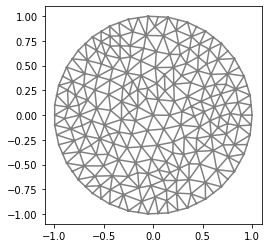

In [3]:
domain = Circle(Point(.0,.0), 1)
disk_mesh = generate_mesh(domain, 10)
plot(disk_mesh)

### Step 2: Define the Function Space

In [4]:
FS_disk = FunctionSpace(disk_mesh, 'Lagrange', 1)

u = TrialFunction(FS_disk)
v = TestFunction(FS_disk)

### Step 3: Define the Boundary Conditions

In [5]:
def disk_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), 1, 5e-2)

BC_disk = DirichletBC(FS_disk, Constant(1), disk_boundary)

### Step 4: Define the Variational Problem

In [6]:
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx
f =  Expression("x[0]*x[0]/2 + x[1]*x[1]", degree=1)
right_integrand = f*v*dx

### Step 5: Assemble and Solve the Problem

In [7]:
#set up linear algebra problem
A = assemble(left_integrand)
b = assemble(right_integrand)
BC_disk.apply(A,b)
disk_sol = Function(FS_disk) # placeholder for solution
solve(A, disk_sol.vector(), b)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


1

### Step 6: Visualize the Results

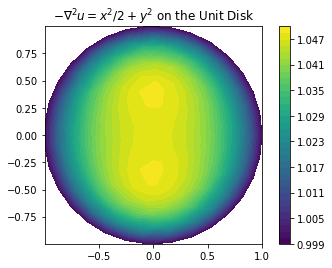

In [8]:
p = plot(disk_sol)
plt.title(r'$-∇ ^2 u = x^2/2+y^2$ on the Unit Disk')
plt.colorbar(p)
plt.show()

## Solve on Perforated Disk

### Step 1: Define the Domain

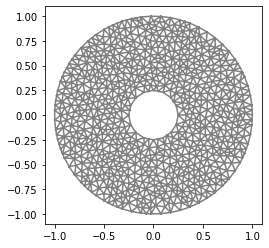

In [23]:
r_outer = 1
r_inner = 0.25
wedge = Circle(Point(.0, .0), r_outer) - Circle(Point(.0, .0), r_inner)
wedge_mesh = generate_mesh(wedge, 20)
plot(wedge_mesh)

### Step 2: Define the Function Space

In [24]:
FS_wedge = FunctionSpace(wedge_mesh, 'Lagrange', 1)
u = TrialFunction(FS_wedge)
v = TestFunction(FS_wedge)

### Step 3: Define the Boundary Conditions

In [25]:
def inner_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2),r_inner, 5e-2)

def outer_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2),r_outer, 5e-2)

boundary = [DirichletBC(FS_wedge, Constant(5), inner_boundary),
           DirichletBC(FS_wedge, Constant(0), outer_boundary)]

### Step 4: Define the Variational Problem

In [30]:
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx
f =  Constant(0)
right_integrand = f*v*dx

### Step 5

In [31]:
sol = Function(FS_wedge)
solve(left_integrand == right_integrand, sol, boundary)

### Step 6

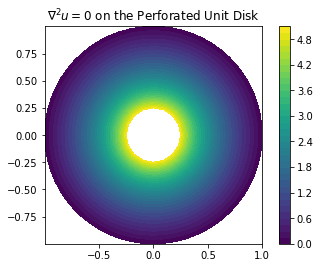

In [32]:
p = plot(sol)
plt.title(r'$∇ ^2 u = 0$ on the Perforated Unit Disk')
plt.colorbar(p)
plt.show()